## Understanding the Dataset

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv("../Dataset.csv")

In [3]:
dataset['SepsisLabel'].value_counts()

SepsisLabel
0    1524294
1      27916
Name: count, dtype: int64

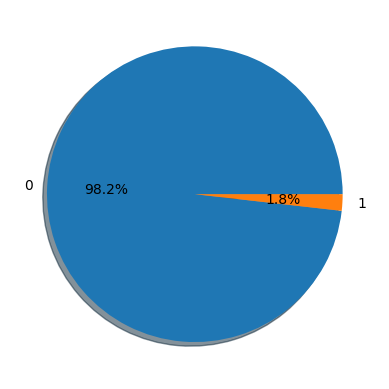

In [4]:
plt.pie(dataset['SepsisLabel'].value_counts(), labels=['0','1'], autopct='%1.1f%%', shadow=True)
plt.show()

In [5]:
dataset.drop(['Patient_ID', 'Unnamed: 0', 'Unit1', 'Unit2', 'Gender', 'Hour'], axis=1, inplace=True)

## Resampling the Dataset
As the dataset is highly unbalanced

In [6]:
from sklearn.utils import resample
df_majority = dataset[dataset.SepsisLabel==0]
df_minority = dataset[dataset.SepsisLabel==1]

In [7]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1524294,    # to match majority class
                                 random_state=400) # reproducible results

In [8]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.SepsisLabel.value_counts()

SepsisLabel
0    1524294
1    1524294
Name: count, dtype: int64

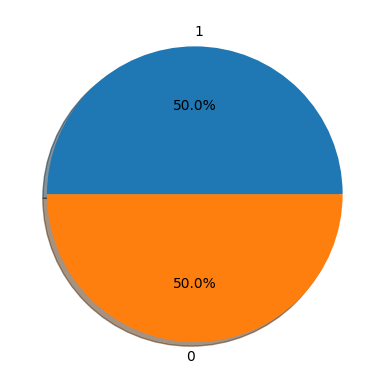

In [9]:
plt.pie(df_upsampled['SepsisLabel'].value_counts(), labels=['1','0'], autopct='%1.1f%%', shadow=True)
plt.show()

In [10]:
# Print the columns of df_upsampled to check the correct index
print(df_upsampled.columns)

# Select the correct column index or name
# Assuming 'SepsisLabel' is the target column
Y = df_upsampled['SepsisLabel'].values
Y

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'HospAdmTime', 'ICULOS',
       'SepsisLabel'],
      dtype='object')


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [11]:
dataset.head(10)
dataset.head(0)


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel


## Feature Selection

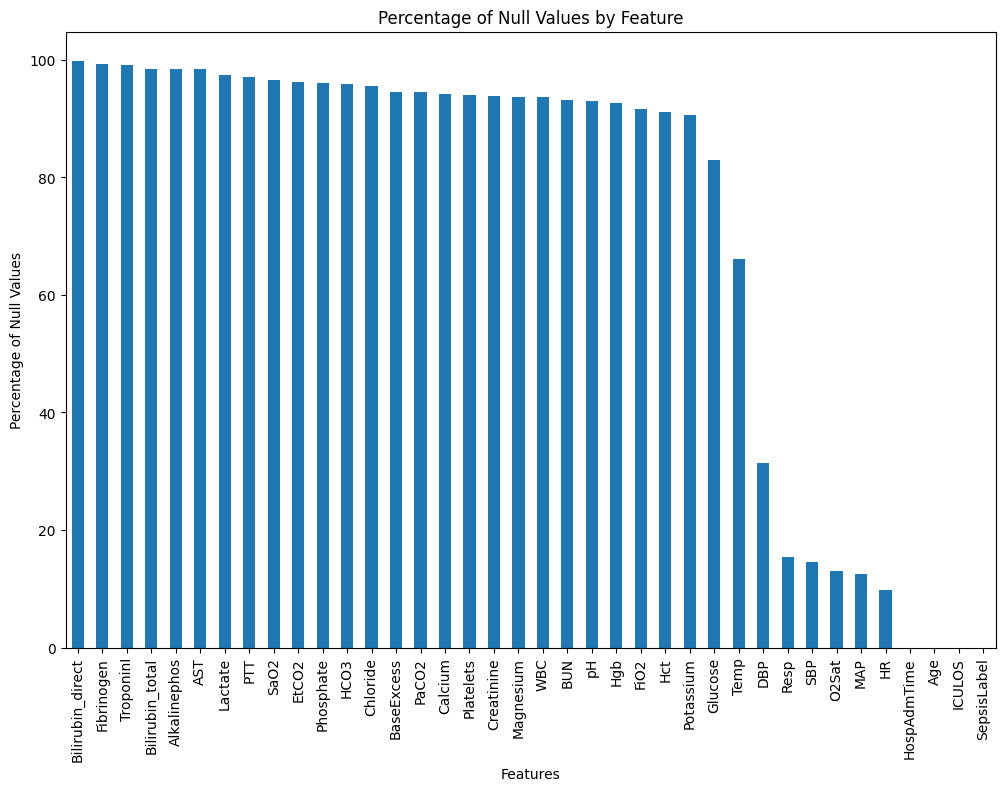

In [12]:
import matplotlib.pyplot as plt

# Calculate the percentage of null values for each feature
null_percentage = dataset.isnull().mean() * 100

# Sort the features by the percentage of null values in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False)

# Plot the graph
plt.figure(figsize=(12,8))
null_percentage_sorted.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values by Feature')
plt.show()

In [13]:
# Calculate the percentage of null values for the 'EtCO2' feature
# etco2_null_percentage = dataset['EtCO2'].isnull().mean() * 100

# print(f"Percentage of null values in 'EtCO2': {etco2_null_percentage:.2f}%")

In [14]:
# Identify features with more than 95% null values
features_to_drop = null_percentage[null_percentage > 95].index

# Drop those features from the dataset
dataset = dataset.drop(columns=features_to_drop)

print(f"Dropped features with more than 95% null values:\n{features_to_drop}")

Dropped features with more than 95% null values:
Index(['EtCO2', 'HCO3', 'SaO2', 'AST', 'Alkalinephos', 'Chloride',
       'Bilirubin_direct', 'Lactate', 'Phosphate', 'Bilirubin_total',
       'TroponinI', 'PTT', 'Fibrinogen'],
      dtype='object')


In [15]:
# dataset.drop(['Unit1', 'Unit2'], axis=1, inplace=True)
dataset.head(10)
dataset.head(0)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Magnesium,Potassium,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel


In [16]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the dataset and transform the data
dataset_imputed = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

# Check if there are any missing values left
print(dataset_imputed.isnull().sum().sum())
print(dataset_imputed.head(10))

0
          HR       O2Sat       Temp         SBP      MAP        DBP  \
0  84.581443   97.193955  36.977228  123.750465  82.4001  63.830556   
1  65.000000  100.000000  36.977228  123.750465  72.0000  63.830556   
2  78.000000  100.000000  36.977228  123.750465  42.5000  63.830556   
3  73.000000  100.000000  36.977228  123.750465  82.4001  63.830556   
4  70.000000  100.000000  36.977228  129.000000  74.0000  69.000000   
5  62.000000  100.000000  36.977228  124.000000  85.0000  61.000000   
6  61.000000  100.000000  36.977228  101.000000  75.0000  58.000000   
7  68.000000  100.000000  35.780000  142.000000  93.5000  78.000000   
8  71.000000  100.000000  36.977228  121.000000  74.0000  91.000000   
9  69.000000  100.000000  36.977228  120.000000  79.0000  98.000000   

        Resp  BaseExcess      FiO2        pH  ...  Magnesium  Potassium  \
0  18.726498   -0.689919  0.554839  7.378934  ...    2.05145   4.135528   
1  16.500000   -0.689919  0.400000  7.378934  ...    2.05145   4.1

In [17]:
dataset_imputed.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,pH,...,Magnesium,Potassium,Hct,Hgb,WBC,Platelets,Age,HospAdmTime,ICULOS,SepsisLabel
0,84.581443,97.193955,36.977228,123.750465,82.4001,63.830556,18.726498,-0.689919,0.554839,7.378934,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,1.0,0.0
1,65.000000,100.000000,36.977228,123.750465,72.0000,63.830556,16.500000,-0.689919,0.400000,7.378934,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,2.0,0.0
2,78.000000,100.000000,36.977228,123.750465,42.5000,63.830556,18.726498,-0.689919,0.554839,7.378934,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,3.0,0.0
3,73.000000,100.000000,36.977228,123.750465,82.4001,63.830556,17.000000,-0.689919,0.554839,7.378934,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,4.0,0.0
4,70.000000,100.000000,36.977228,129.000000,74.0000,69.000000,14.000000,-0.689919,0.400000,7.378934,...,1.60000,3.200000,29.700000,9.500000,11.300000,330.000000,68.54,-0.02,5.0,0.0
5,62.000000,100.000000,36.977228,124.000000,85.0000,61.000000,14.000000,6.000000,0.400000,7.610000,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,6.0,0.0
6,61.000000,100.000000,36.977228,101.000000,75.0000,58.000000,14.000000,-0.689919,0.554839,7.378934,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,7.0,0.0
7,68.000000,100.000000,35.780000,142.000000,93.5000,78.000000,16.000000,-0.689919,0.554839,7.378934,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,8.0,0.0
8,71.000000,100.000000,36.977228,121.000000,74.0000,91.000000,14.000000,3.000000,0.500000,7.460000,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,9.0,0.0
9,69.000000,100.000000,36.977228,120.000000,79.0000,98.000000,14.000000,-0.689919,0.554839,7.378934,...,2.05145,4.135528,30.794093,10.430833,11.446405,196.013911,68.54,-0.02,10.0,0.0


In [18]:
X = dataset_imputed.drop('SepsisLabel', axis=1)
y = dataset_imputed['SepsisLabel']
print("Features selected for X:\n", X.columns)
print("Target variable y:\n", y.name)

Features selected for X:
 Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess',
       'FiO2', 'pH', 'PaCO2', 'BUN', 'Calcium', 'Creatinine', 'Glucose',
       'Magnesium', 'Potassium', 'Hct', 'Hgb', 'WBC', 'Platelets', 'Age',
       'HospAdmTime', 'ICULOS'],
      dtype='object')
Target variable y:
 SepsisLabel


In [19]:
# Split data based on ICU Length of Stay (ICULOS)
short_stay = dataset_imputed[dataset_imputed['ICULOS'] <= 56]
long_stay = dataset_imputed[dataset_imputed['ICULOS'] > 56]

In [20]:
short_stay_counts = len(short_stay)
print("Short Stay Class Distribution:")
print(short_stay_counts)

# Count values in long_stay dataset
long_stay_counts = len(long_stay)
print("\nLong Stay Class Distribution:")
print(long_stay_counts)

Short Stay Class Distribution:
1462783

Long Stay Class Distribution:
89427


In [21]:
feature_cols = X.columns
X_short, y_short = short_stay[feature_cols], short_stay['SepsisLabel']
X_long, y_long = long_stay[feature_cols], long_stay['SepsisLabel']

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, precision_recall_curve, accuracy_score, f1_score, matthews_corrcoef, auc
import joblib

In [23]:
def train_save_evaluate_models(models, file_prefix="model"):
    results = {}
    
    for model_name, model in models.items():
        if model_name == "Short Stay Model":
            X, y = X_short, y_short
        elif model_name == "Long Stay Model":
            X, y = X_long, y_long
        else:
            continue  # Skip if model name is not recognized
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        # Fit the model
        model.fit(X_train, y_train)

        # Save the model
        model_filename = f"{file_prefix}_{model_name.replace(' ', '_')}.sav"
        joblib.dump(model, model_filename)

        # Load the model for evaluation
        loaded_model = joblib.load(model_filename)

        # Evaluate the loaded model
        y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
        y_pred = loaded_model.predict(X_test)

        # Metrics calculation
        auc_score = roc_auc_score(y_test, y_pred_proba)
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        auprc_score = auc(recall, precision)
        accuracy_score_value = accuracy_score(y_test, y_pred)
        f1_score_value = f1_score(y_test, y_pred)
        mcc_score = matthews_corrcoef(y_test, y_pred)
        
        # Store results for the current model
        results[model_name] = {
            "AUROC": auc_score,
            "AUPRC": auprc_score,
            "Accuracy": accuracy_score_value,
            "F-Measure (F1 Score)": f1_score_value,
            "MCC": mcc_score,
        }

    return results

In [24]:
models = {
    "Short Stay Model": RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    ),
    "Long Stay Model": SVC(
        probability=True,
        kernel='rbf',
        random_state=80
    ),
}

# Train, save, and evaluate all models
evaluation_results = train_save_evaluate_models(models)

# Print results
print("Evaluation Results:")
for model_name, metrics in evaluation_results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Calculate and print the mean of the evaluation metrics for both models
mean_metrics = {}
for metric in evaluation_results["Short Stay Model"]:
    mean_metrics[metric] = (
        evaluation_results["Short Stay Model"][metric] + evaluation_results["Long Stay Model"][metric]
    ) / 2

print("\nMean Evaluation Metrics:")
for metric, value in mean_metrics.items():
    print(f"{metric}: {value:.4f}")

# Test data evaluation (if test data is provided separately)
def evaluate_on_test_data(model_filename, X_test, y_test):
    # Load the model
    loaded_model = joblib.load(model_filename)

    # Predict and evaluate
    y_pred_proba = loaded_model.predict_proba(X_test)[:, 1]
    y_pred = loaded_model.predict(X_test)
    metrics = {
        "AUROC": roc_auc_score(y_test, y_pred_proba),
        "AUPRC": auc(*precision_recall_curve(y_test, y_pred_proba)[1::-1]),
        "Accuracy": accuracy_score(y_test, y_pred),
        "F-Measure (F1 Score)": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
    }
    return metrics

Evaluation Results:

Short Stay Model:
AUROC: 0.7280
AUPRC: 0.0559
Accuracy: 0.9876
F-Measure (F1 Score): 0.0000
MCC: 0.0000

Long Stay Model:
AUROC: 0.5285
AUPRC: 0.1299
Accuracy: 0.8909
F-Measure (F1 Score): 0.0000
MCC: 0.0000

Mean Evaluation Metrics:
AUROC: 0.6283
AUPRC: 0.0929
Accuracy: 0.9393
F-Measure (F1 Score): 0.0000
MCC: 0.0000
